<a href="https://colab.research.google.com/github/Adhi1755/Pharma-Sales-Analysis/blob/main/Pharma_sales_data_analysis_and_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pharma sales data analysis and forecasting**

This notebook performs an in-depth analysis of pharmaceutical sales data, focusing on identifying trends, seasonal patterns, and variability across different drug categories. The analysis covers:

1.  **Data Loading and Preparation**: Importing daily, hourly, weekly, and monthly sales data, checking for data quality (missing values, duplicates), and ensuring correct data types.
2.  **Exploratory Data Analysis (EDA)**:
    *   Analyzing the proportion of total sales for each drug category to identify the most consumed drugs.
    *   Calculating and visualizing the Coefficient of Variation (CV) to understand sales variability and predictability across categories.
    *   Investigating monthly mean sales trends to uncover seasonal patterns for each drug type.

The insights gained from this analysis are crucial for inventory management, marketing strategies, and resource allocation within pharmacies, enabling better anticipation of demand based on temporal patterns.

## **Introduction**

The dataset is built from the initial dataset consisted of 600000 transactional data collected in 6 years (period 2014-2019), indicating date and time of sale, pharmaceutical drug brand name and sold quantity, exported from Point-of-Sale system in the individual pharmacy. Selected group of drugs from the dataset (57 drugs) is classified to the following Anatomical Therapeutic Chemical (ATC) Classification System categories:


1.   **M01AB** - Anti-inflammatory and antirheumatic products, non-steroids, Acetic acid derivatives and related substances
2.   **M01AE** - Anti-inflammatory and antirheumatic products, non-steroids, Propionic acid derivatives
4.   **N02BA** - Other analgesics and antipyretics, Salicylic acid and derivatives
5.   **N02BE/B** - Other analgesics and antipyretics, Pyrazolones and Anilides
6.   **N05B** - Psycholeptics drugs, Anxiolytic drugs
8.   **N05C** - Psycholeptics drugs, Hypnotics and sedatives drugs
9.   **R03** - Drugs for obstructive airway diseases
10.   **R06** - Antihistamines for systemic use

Sales data are resampled to the hourly, daily, weekly and monthly periods. Data is already pre-processed, where processing included outlier detection and treatment and missing data imputation.

## **Methodology**

The methodology for implementing this case study follows the typical time series forecasting pipeline, consisting of three major phases:

1.   Feature engineering and data preparation
2.   Exploratory data analysis (time-series analysis)
3.   Forecasting.










### **Feature engineering and data preparation**

Enabling the drive access

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Improting the required Libraries**

In [44]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

Dataset details:


1.   SalesDaily - contains daily sales data
2.   salesHourly - contains Hourly sales data
3.   salesMonthly - contains Monthly sales data
4.   salesWeekly - contains Weekly sales data






In [4]:
salesDaily = pd.read_csv('/content/drive/MyDrive/Google Colab/Pharma_Sales/salesdaily.csv')
salesHourly = pd.read_csv('/content/drive/MyDrive/Google Colab/Pharma_Sales/saleshourly.csv')
salesMonthly = pd.read_csv('/content/drive/MyDrive/Google Colab/Pharma_Sales/salesmonthly.csv')
salesWeekly = pd.read_csv('/content/drive/MyDrive/Google Colab/Pharma_Sales/salesweekly.csv')

In [15]:
#Displaying the first 5 rows of the dataset to get a overview of it
salesDaily.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
0,2014-01-02,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday
1,2014-01-03,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday
2,2014-01-04,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday
3,2014-01-05,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday
4,2014-01-06,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday


In [16]:
#shape of the dataset (rows,cols)
salesDaily.shape

(2106, 13)

In [17]:
#info of the datasets
salesDaily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datum         2106 non-null   datetime64[ns]
 1   M01AB         2106 non-null   float64       
 2   M01AE         2106 non-null   float64       
 3   N02BA         2106 non-null   float64       
 4   N02BE         2106 non-null   float64       
 5   N05B          2106 non-null   float64       
 6   N05C          2106 non-null   float64       
 7   R03           2106 non-null   float64       
 8   R06           2106 non-null   float64       
 9   Year          2106 non-null   int64         
 10  Month         2106 non-null   int64         
 11  Hour          2106 non-null   int64         
 12  Weekday Name  2106 non-null   object        
dtypes: datetime64[ns](1), float64(8), int64(3), object(1)
memory usage: 214.0+ KB


As the date-time column is stored as an object, it is converted to the ***datetime*** format to support time-based indexing, resampling, and temporal analysis.




In [18]:
#Converting the dtype of 'datum' col to datetime format
salesDaily['datum'] = pd.to_datetime(salesDaily['datum'])

#Verifying the chnages
display(salesDaily.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datum         2106 non-null   datetime64[ns]
 1   M01AB         2106 non-null   float64       
 2   M01AE         2106 non-null   float64       
 3   N02BA         2106 non-null   float64       
 4   N02BE         2106 non-null   float64       
 5   N05B          2106 non-null   float64       
 6   N05C          2106 non-null   float64       
 7   R03           2106 non-null   float64       
 8   R06           2106 non-null   float64       
 9   Year          2106 non-null   int64         
 10  Month         2106 non-null   int64         
 11  Hour          2106 non-null   int64         
 12  Weekday Name  2106 non-null   object        
dtypes: datetime64[ns](1), float64(8), int64(3), object(1)
memory usage: 214.0+ KB


None

In [20]:
#Statistical properties of a dataset
salesDaily.describe()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour
count,2106,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000
mean,2016-11-19 12:00:00.000000256,5.033683,3.895830,3.880441,29.917095,8.853627,0.593522,5.512262,2.900198,2016.401235,6.344255,275.945869
min,2014-01-02 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,1.000000,190.000000
25%,2015-06-12 06:00:00,3.000000,2.340000,2.000000,19.000000,5.000000,0.000000,1.000000,1.000000,2015.000000,3.000000,276.000000
50%,2016-11-19 12:00:00,4.990000,3.670000,3.500000,26.900000,8.000000,0.000000,4.000000,2.000000,2016.000000,6.000000,276.000000
75%,2018-04-29 18:00:00,6.670000,5.138000,5.200000,38.300000,12.000000,1.000000,8.000000,4.000000,2018.000000,9.000000,276.000000
max,2019-10-08 00:00:00,17.340000,14.463000,16.000000,161.000000,54.833333,9.000000,45.000000,15.000000,2019.000000,12.000000,276.000000
std,NaN,2.737579,2.133337,2.384010,15.590966,5.605605,1.092988,6.428736,2.415816,1.665060,3.386954,1.970547


In [21]:
#chechking for duplicates
salesDaily.duplicated().sum()

np.int64(0)

In [27]:
#lets see the start and end date in dataset
salesDaily['datum'].min(),salesDaily['datum'].max()

(Timestamp('2014-01-02 00:00:00'), Timestamp('2019-10-08 00:00:00'))

In [26]:
#lets see the if any gaps exists in the date and time
salesDaily['datum'].diff().value_counts()

,count
datum,
1 days,2105




The dataset exhibits **high data quality**, with **no duplicate or missing values** across its *2106 observations and 13 well-defined features*. All variables are correctly typed, ensuring structural consistency and suitability for exploratory data analysis and time-series forecasting. Temporal difference analysis further confirms that the data is recorded at a strictly daily frequency with **no missing or irregular timestamps**. This temporal continuity ensures high integrity for time-series modeling and eliminates the need for resampling or interpolation.


### **Exploratory data analysis (time-series analysis)**

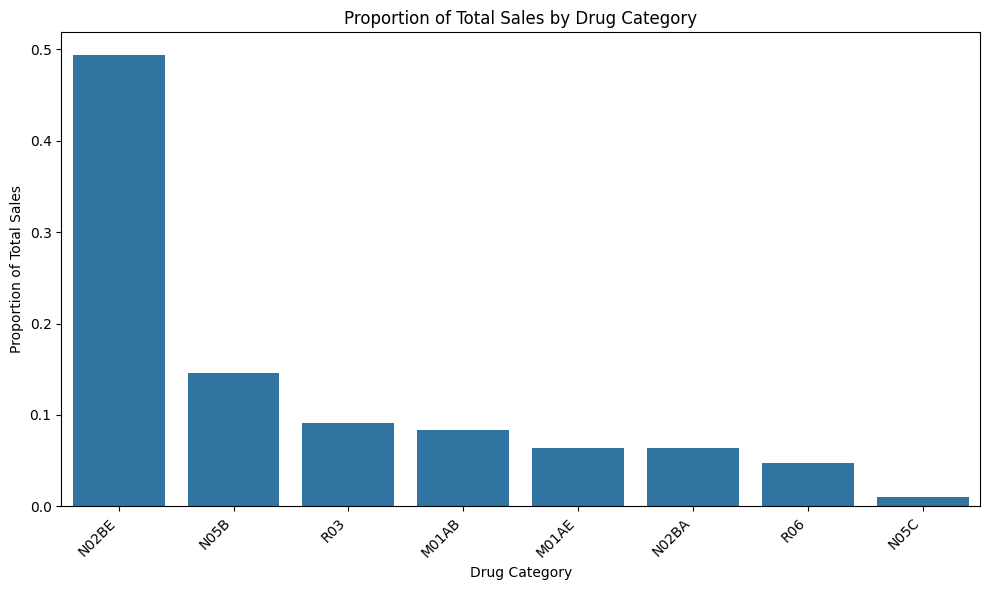

In [31]:
#lets see which drugs dominate total consumption
total = salesDaily[['M01AB','M01AE','N02BA','N02BE','N05B','N05C','R03','R06']].sum()

# Calculate proportions
drug_proportions = (total / total.sum()).sort_values(ascending=False)

# Visualize in a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=drug_proportions.index, y=drug_proportions.values)
plt.title('Proportion of Total Sales by Drug Category')
plt.xlabel('Drug Category')
plt.ylabel('Proportion of Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Based on the bar chart, **N02BE** shows the **highest consumption** among the drugs, while **N05C** has the **lowest consumption**.



*   **N02BE/B** represents other *analgesics and antipyretics* (such as pyrazolones and anilides), which are commonly used to relieve pain and reduce fever.
*   **N05C** corresponds to *psycholeptics, specifically hypnotics* and *sedatives*, which are used to treat sleep disorders and anxiety-related conditions.



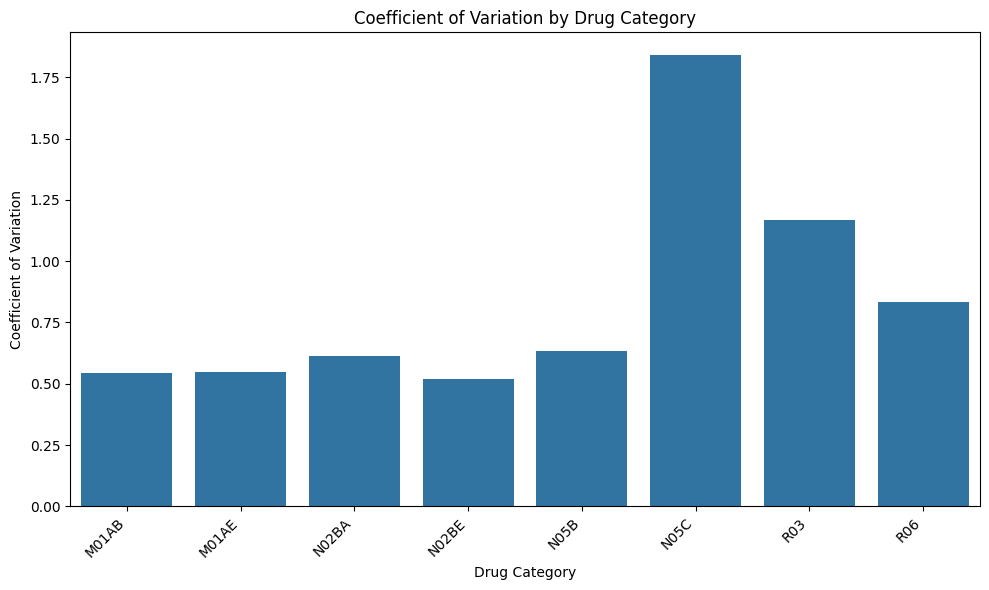

In [34]:
#Coefficient of Variation
cv = salesDaily[['M01AB','M01AE','N02BA','N02BE','N05B','N05C','R03','R06']].std() / \
     salesDaily[['M01AB','M01AE','N02BA','N02BE','N05B','N05C','R03','R06']].mean()
cv.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=cv.index, y=cv.values)
plt.title('Coefficient of Variation by Drug Category')
plt.xlabel('Drug Category')
plt.ylabel('Coefficient of Variation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



From the results:

*   **N05C** has the highest CV (around 1.84), indicating its sales are the most variable and inconsistent.
*  **R03** also shows high variability (around 1.17).
*   **M01AB, M01AE,** and **N02BE** have the lowest CVs (around 0.52-0.54), suggesting their sales are relatively more stable and predictable compared to other drug categories.






**Montly Sales Trend**

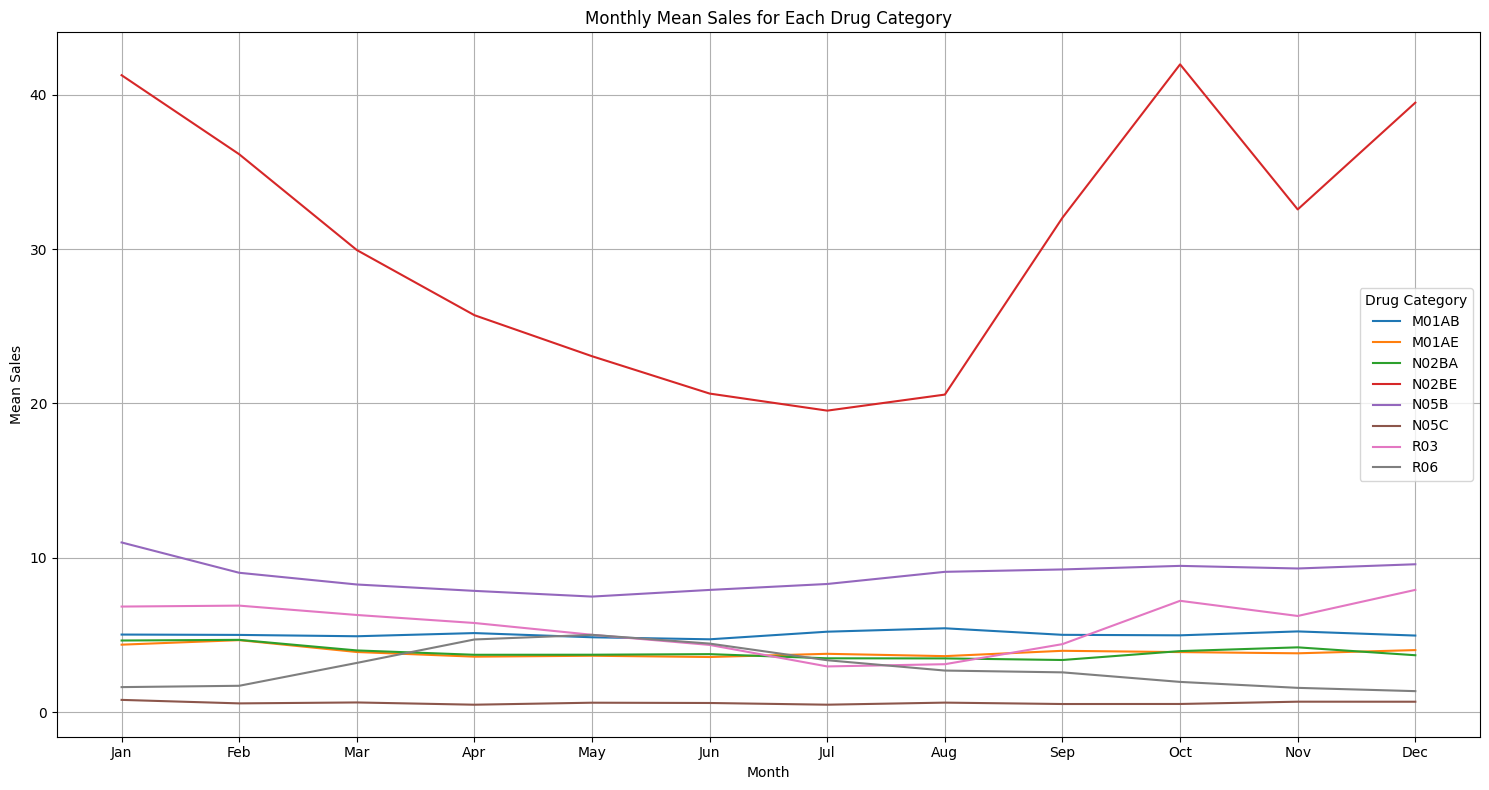

In [39]:
#Monthly Mean Sales Trends
drug_columns = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']
monthly_mean_sales = salesDaily.groupby('Month')[drug_columns].mean()

plt.figure(figsize=(15, 8))
for col in drug_columns:
    plt.plot(monthly_mean_sales.index, monthly_mean_sales[col], label=col)
plt.title('Monthly Mean Sales for Each Drug Category')
plt.xlabel('Month')
plt.ylabel('Mean Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Drug Category')
plt.grid(True)
plt.tight_layout()
plt.show()

The line plot of monthly mean sales for each drug category reveals distinct seasonal patterns:

*   **N02BE (Other analgesics and antipyretics)**: This category consistently shows the highest sales volume. There's a clear seasonal pattern with **peaks in colder months (January, February, October, November, December)** and **troughs in warmer months (June, July, August)**. This suggests a higher demand for pain and fever relief during cold and flu seasons.

*   **N05B (Anxiolytic drugs)**: Sales for N05B generally remain stable throughout the year, with a slight **peak in winter months (January-February)** and a **slight dip in summer months (June-August)**. This suggests a less pronounced seasonality compared to N02BE.

*   **R03 (Drugs for obstructive airway diseases)**: This category exhibits a strong seasonal pattern, with pronounced **peaks during the colder months (late autumn, winter, early spring: October-April)**, indicating increased prevalence of respiratory issues during these periods. Sales are lowest in summer.

*   **M01AB (Acetic acid derivatives) and M01AE (Propionic acid derivatives)**: These anti-inflammatory and antirheumatic products show similar, relatively stable patterns, with moderate fluctuations. They tend to have slightly **higher sales in winter and lower in summer**, possibly linked to conditions exacerbated by cold weather or changes in physical activity.

*   **N02BA (Salicylic acid and derivatives)**: Sales for this category are also relatively stable but show a moderate **peak in colder months (January-March, October-December)**, similar to N02BE, though with lower overall volume.

*   **R06 (Antihistamines for systemic use)**: This category shows a unique pattern with **peaks in spring and summer (March-May)**, which aligns with allergy seasons, and **troughs in winter**.

*   **N05C (Hypnotics and sedatives drugs)**: This category has the lowest sales volume and shows relatively stable, though very low, sales throughout the year, with minor fluctuations that do not indicate a strong seasonal pattern. Its overall low volume makes any seasonal patterns less significant.


**Overall Findings:**

*   **Strong Seasonality**: Drug categories like **N02BE, R03, N02BA, M01AB, and M01AE** exhibit clear seasonal demand, generally peaking in colder months (winter/early spring) and declining in warmer months (summer). This is likely driven by the prevalence of illnesses like colds, flu, and respiratory conditions.
*   **Allergy Season Peak**: **R06** stands out with its peak during spring/summer, directly correlating with allergy seasons.
*   **Relatively Stable Demand**: **N05B** and **N05C** show more consistent demand throughout the year, with **N05C** having negligible fluctuations due to its very low sales volume.
*   **Dominant Category**: **N02BE** consistently has the highest sales, highlighting its broad and continuous demand, especially during colder periods.

These patterns provide valuable insights for inventory management, marketing strategies, and resource allocation within pharmacies, allowing them to anticipate demand based on the time of year.

**Weekly Sales Trend**

In [40]:
salesDaily['Week'] = salesDaily['datum'].dt.isocalendar().week.astype(int)
display(salesDaily.head())

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name,Week
0,2014-01-02,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday,1
1,2014-01-03,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday,1
2,2014-01-04,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday,1
3,2014-01-05,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday,1
4,2014-01-06,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday,2


In [41]:
drug_columns = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']
weekly_mean_sales = salesDaily.groupby('Week')[drug_columns].mean()
display(weekly_mean_sales.head())

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
Week,,,,,,,,
1,5.008910,3.853910,3.995940,43.373590,7.664530,0.434829,5.971955,1.732906
2,5.219663,4.053010,5.469643,42.122718,12.361905,0.700397,4.920635,1.270635
3,5.364147,4.576629,5.151190,40.518651,11.757937,0.847222,8.295635,1.817460
4,5.186925,4.971996,4.672817,44.060214,11.876984,0.912698,8.057540,1.552579
5,5.909226,5.561688,4.354960,38.418079,10.269841,1.003968,7.507937,1.822222


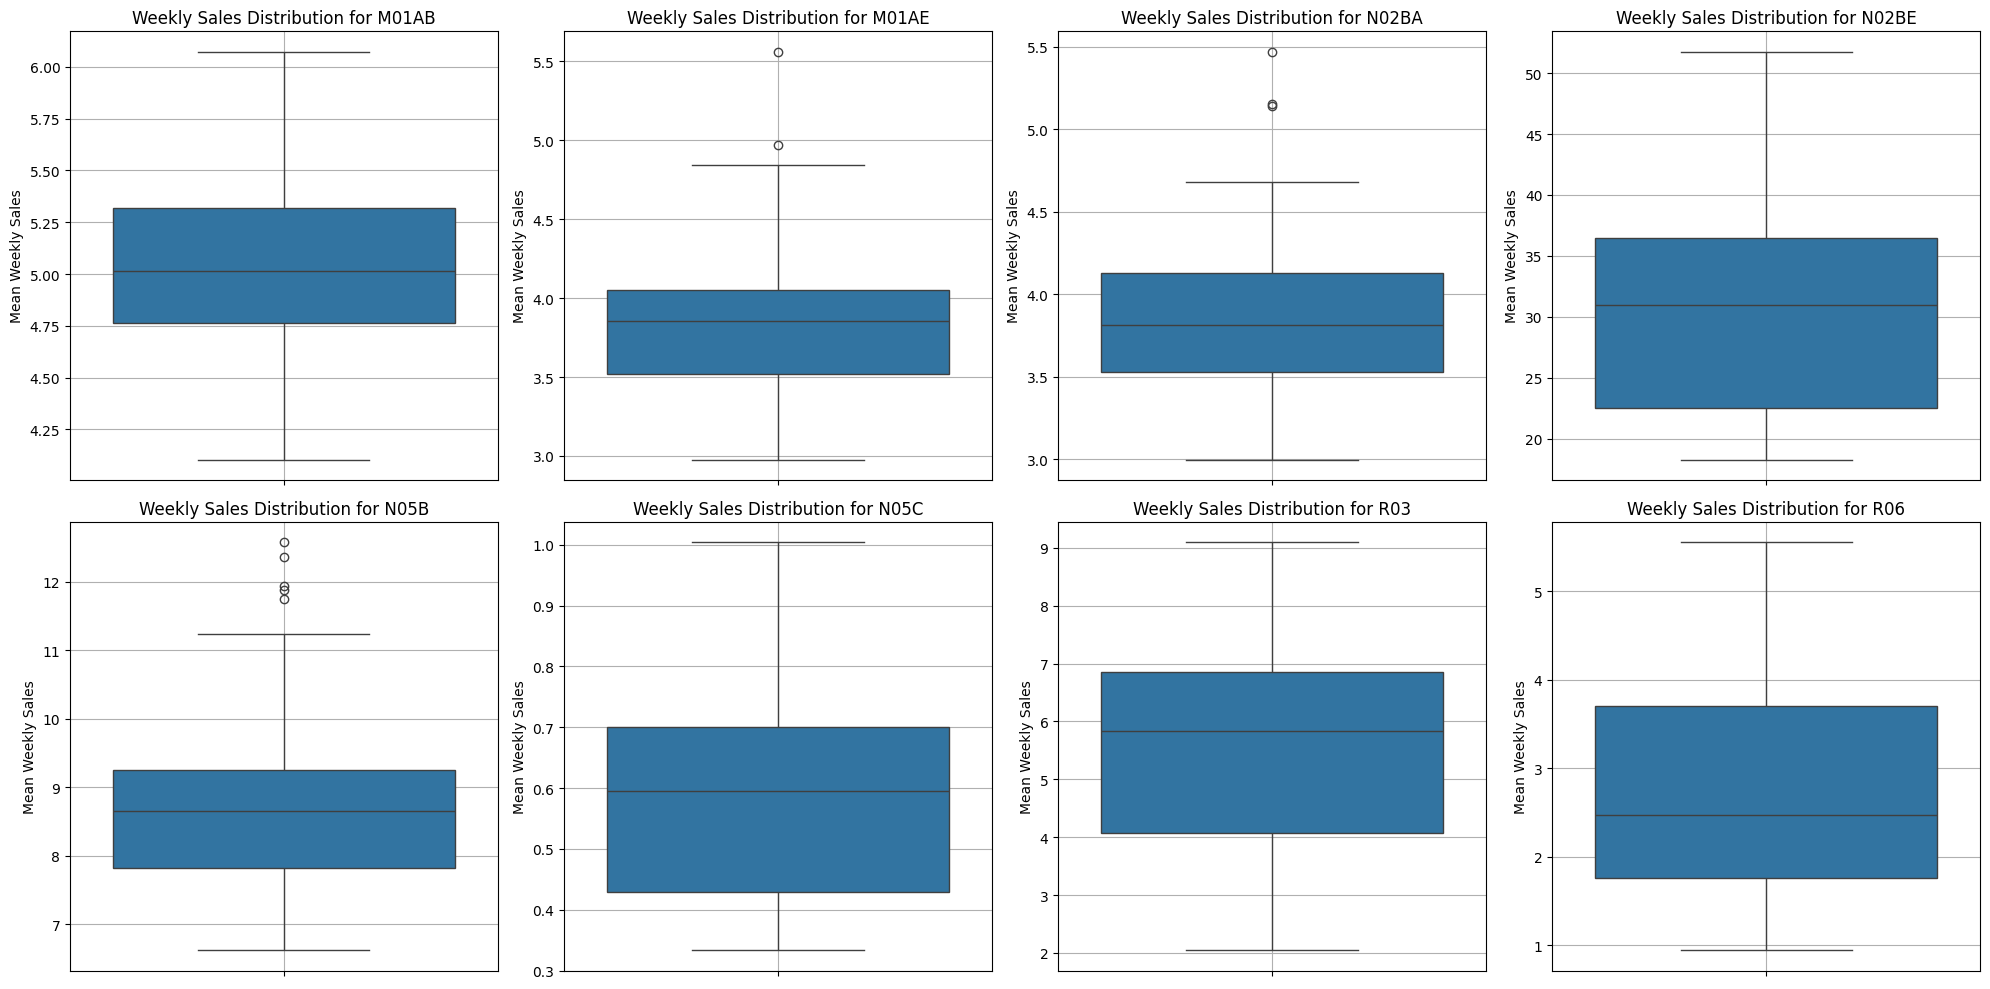

In [46]:
drug_columns = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']

# Calculate the number of rows and columns for the subplot grid
num_drugs = len(drug_columns)
num_cols = 4  # You can adjust this number
num_rows = math.ceil(num_drugs / num_cols)

plt.figure(figsize=(num_cols * 5, num_rows * 5))

for i, col in enumerate(drug_columns):
    plt.subplot(num_rows, num_cols, i + 1) # Create a subplot for each drug
    sns.boxplot(y=weekly_mean_sales[col])
    plt.title(f'Weekly Sales Distribution for {col}')
    plt.ylabel('Mean Weekly Sales')
    plt.grid(True)

plt.tight_layout()
plt.show()


By reviewing the box plots for each drug category, we can observe distinct patterns in weekly sales distribution and variability:

*   **N02BE (Other analgesics and antipyretics)**:
    *   **Median and Spread**: Consistently shows the highest median weekly sales, indicating it's the most frequently sold drug category on a weekly basis. The box is relatively compact, suggesting moderate variability in its weekly sales compared to its high volume.
    *   **Outliers**: There are some outliers on the higher end, indicating weeks with exceptionally high demand.
    *   **Pattern**: Its high median and consistent spread suggest a stable, high-demand product with occasional spikes.

*   **N05B (Anxiolytic drugs)**:
    *   **Median and Spread**: Exhibits the second-highest median sales. The box is also relatively compact, showing consistent weekly sales, although with a wider spread than N02BE, implying slightly more variability.
    *   **Outliers**: Few upper outliers are visible.
    *   **Pattern**: A high and relatively stable demand, with some weeks performing better than others.

*   **M01AB (Acetic acid derivatives) and M01AE (Propionic acid derivatives)**:
    *   **Median and Spread**: These categories have similar median sales, which are lower than N02BE and N05B. Their boxes are of comparable size, indicating similar levels of weekly sales variability. They tend to have a moderate spread, showing consistent but fluctuating demand.
    *   **Outliers**: Some high-end outliers are present for both.
    *   **Pattern**: Moderate, stable demand with some weekly fluctuations.

*   **N02BA (Salicylic acid and derivatives)**:
    *   **Median and Spread**: Similar to M01AB and M01AE in terms of median sales and spread. Weekly sales are fairly consistent but with noticeable fluctuations.
    *   **Outliers**: Exhibits a few upper outliers.
    *   **Pattern**: Moderate and generally consistent demand.

*   **R03 (Drugs for obstructive airway diseases)**:
    *   **Median and Spread**: Shows a lower median compared to the top categories and a noticeably wider box and longer whiskers, indicating higher variability in weekly sales. This aligns with its higher Coefficient of Variation (CV) noted earlier, suggesting its sales are less predictable on a weekly basis.
    *   **Outliers**: Several upper outliers are present, pointing to specific weeks with significantly elevated demand (likely during colder months).
    *   **Pattern**: Highly variable demand, with significant weekly seasonality or event-driven spikes.

*   **R06 (Antihistamines for systemic use)**:
    *   **Median and Spread**: Has a lower median sales volume. The box plot shows considerable variability, with a relatively wide interquartile range, reflecting its seasonal nature (peaks during allergy seasons, troughs in winter).
    *   **Outliers**: A few upper outliers might correspond to peak allergy season weeks.
    *   **Pattern**: Moderate demand but with strong weekly seasonality, leading to higher variability.

*   **N05C (Hypnotics and sedatives drugs)**:
    *   **Median and Spread**: Consistently exhibits the lowest median weekly sales. The box is very small and often close to zero, reflecting its low sales volume. However, the presence of some outliers, though few, indicates that even for this low-volume drug, there can be rare weeks with higher sales.
    *   **Outliers**: A few upper outliers, which, due to the overall low volume, stand out significantly.
    *   **Pattern**: Very low but relatively stable demand, with occasional minor spikes, making it the most variable in terms of CV due to its low base.

**Overall Summary of Weekly Patterns:**

*   **Dominant and Stable**: N02BE and N05B consistently have higher median weekly sales and relatively stable distributions, indicating their core importance and predictable demand.
*   **Seasonal Variability**: R03 and R06 show higher weekly variability, aligning with their known seasonal demand drivers (respiratory issues in winter, allergies in spring/summer).
*   **Lower Volume, Higher Relative Variability**: N05C, despite its low overall sales, exhibits high relative variability (CV), meaning its weekly sales can fluctuate significantly from its low average.
*   **Moderate and Consistent**: M01AB, M01AE, and N02BA maintain moderate weekly sales with a reasonable level of consistency, albeit with some fluctuations.